In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
import torch

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions
import seaborn as sns
sns.set()

In [ ]:

import warnings
warnings.filterwarnings("ignore")

In [ ]:
X, Y = make_classification(n_samples=150, n_features=2,
                           n_informative=2, n_classes=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=40)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=50,
                                                    random_state=0)

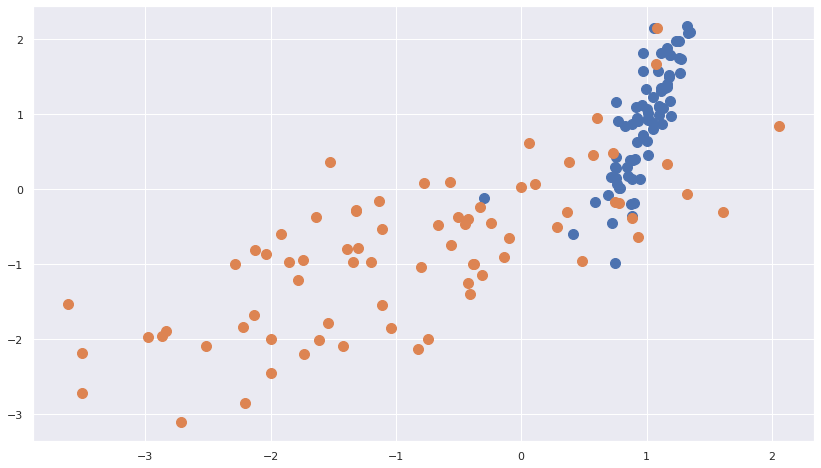

In [ ]:
plt.figure(figsize = (14, 8))
for k in np.unique(Y):

    plt.plot(X[Y==k, 0], X[Y==k, 1], 'o',markersize=10)

plt.show()

# Как лучше празделить данные?

# Плоскостью, если данные разделимы линейно

# Linear Kernel

$$
k(x_i, x_j) = \sum_{j=0}^n (x_i ⋅x_j )
$$

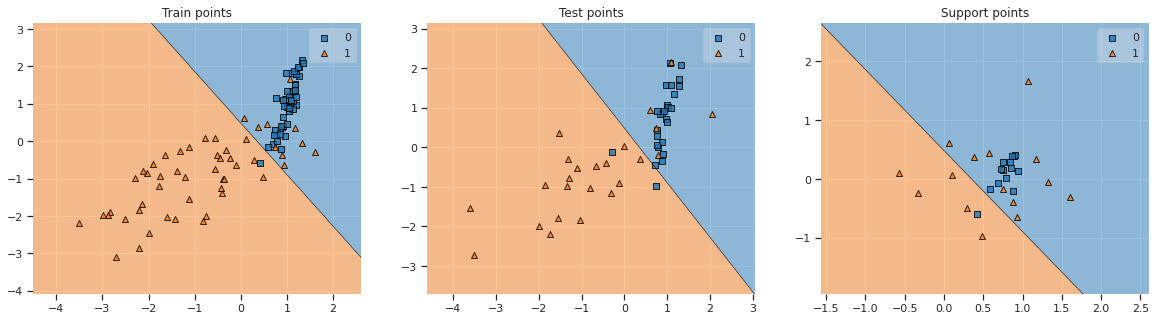

In [ ]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)
fig, gs = plt.figure(figsize=(20,5)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
ax[0].set_title("Train points")
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
ax[1].set_title("Test points")
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])
ax[2].set_title("Support points")

plt.show()

In [ ]:
X_train[model.support_]

array([[ 0.89495408,  0.38851186],
       [ 0.90604116,  0.40483958],
       [ 0.41413784, -0.59317257],
       [ 0.84388907,  0.29131274],
       [ 0.75314878,  0.153907  ],
       [ 0.6934265 , -0.07278077],
       [ 0.86879324,  0.39376754],
       [ 0.74724008,  0.29221334],
       [ 0.58909281, -0.1673736 ],
       [ 0.71982259,  0.1616911 ],
       [ 0.94757453,  0.13250483],
       [ 0.87909157, -0.19794272],
       [ 0.78836261,  0.0132762 ],
       [ 0.85073641,  0.18106757],
       [ 1.07426492,  1.66252785],
       [ 0.10577126,  0.06876877],
       [ 1.1655865 ,  0.34242976],
       [ 1.3204067 , -0.05736185],
       [ 0.28802239, -0.49712824],
       [ 0.57566888,  0.45007528],
       [ 0.92950395, -0.64024595],
       [ 0.38248854,  0.36660065],
       [-0.32813586, -0.2351594 ],
       [ 0.48589868, -0.96231252],
       [-0.56816834,  0.09642017],
       [ 0.0632236 ,  0.61029297],
       [ 0.88417848, -0.38335226],
       [ 0.74619088, -0.16794775],
       [ 1.60802247,

# Случай линейно не разделимых данных

In [ ]:

np.random.seed(0)
m = 150
n = 2
X = 10*np.random.randn(m, n)

Y = np.array((X[:,0]**2+X[:,1]**2+50*np.random.randn(m))<100, dtype=np.int64)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=50,
                                                    random_state=0)


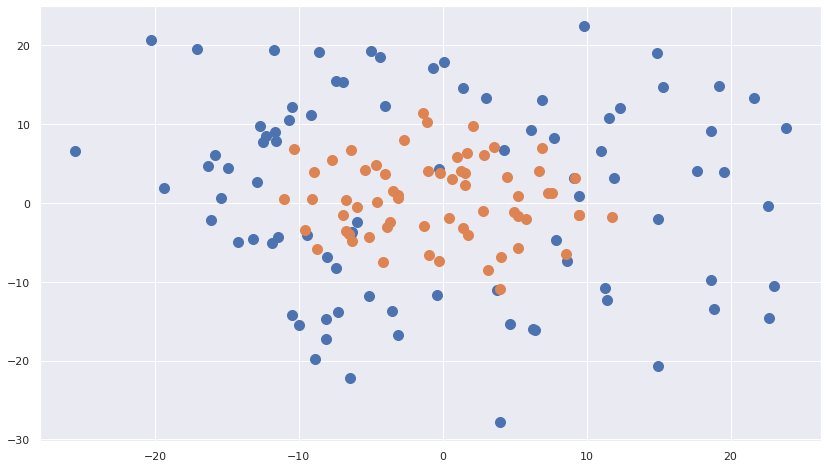

In [ ]:
# for k in np.unique(Y):
#     plt.plot(X[Y==k, 0], X[Y==k, 1], 'o')

# plt.show()
plt.figure(figsize = (14, 8))
for k in np.unique(Y):

    plt.plot(X[Y==k, 0], X[Y==k, 1], 'o',markersize=10)

plt.show()

# попробуем линейно разделить, вдруг прокатит

In [ ]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)

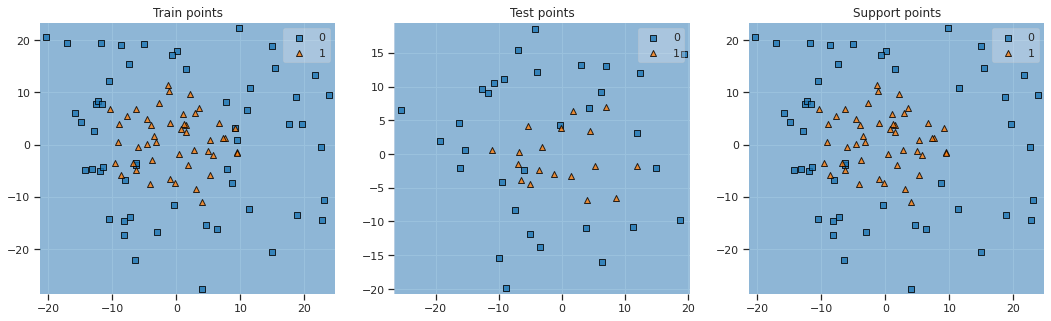

In [ ]:
fig, gs = plt.figure(figsize=(18,5)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))




plot_decision_regions(X_train, Y_train, model, ax=ax[0])
ax[0].set_title("Train points")
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
ax[1].set_title("Test points")
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])
ax[2].set_title("Support points")

plt.show()

# Polynomial kernel

$$
k(x_i, x_j) = (x_i ⋅x_j +1 )^d
$$

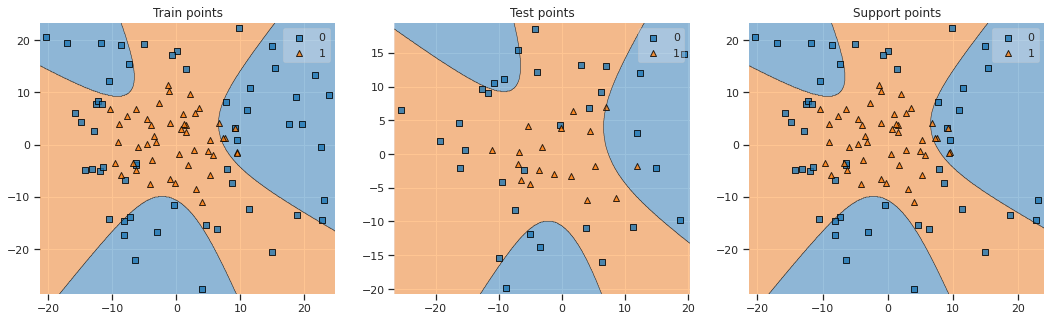

In [ ]:
model = SVC(kernel='poly')
_ = model.fit(X_train, Y_train)

fig, gs = plt.figure(figsize=(18,5)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))




plot_decision_regions(X_train, Y_train, model, ax=ax[0])
ax[0].set_title("Train points")
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
ax[1].set_title("Test points")
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])
ax[2].set_title("Support points")

plt.show()

# Sigmoid kernel

$$
k(x_i, x_j) = \tanh (\kappa x_i ⋅x_j + c ) \\
\kappa > 0\\
c<0
$$

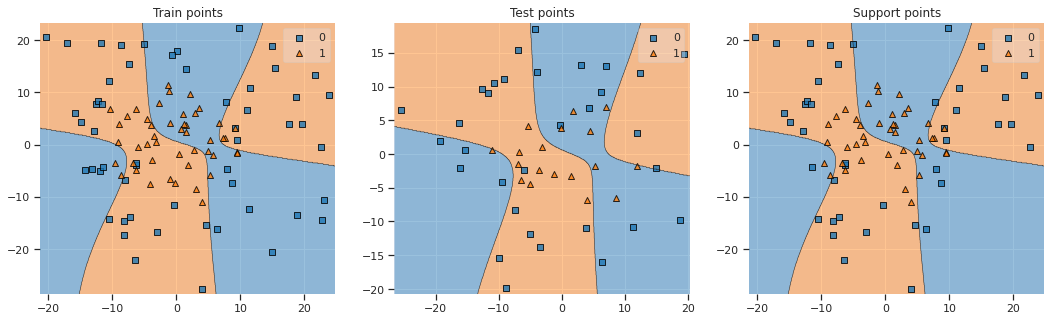

In [ ]:
model = SVC(kernel='sigmoid')
_ = model.fit(X_train, Y_train)


fig, gs = plt.figure(figsize=(18,5)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))




plot_decision_regions(X_train, Y_train, model, ax=ax[0])
ax[0].set_title("Train points")
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
ax[1].set_title("Test points")
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])
ax[2].set_title("Support points")

plt.show()

# Gaussian radial basis function (RBF)

$$
k(x_i, x_j) = exp(-\gamma \|x_i - x_j \|^2) \\
\gamma>0
$$

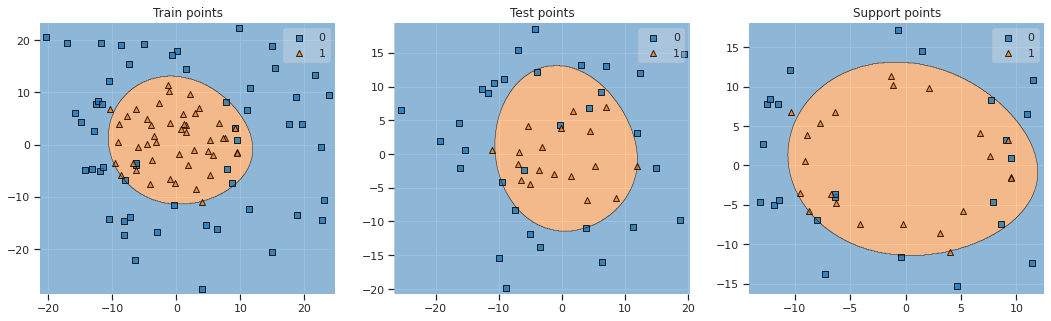

In [ ]:
model = SVC(kernel='rbf')
_ = model.fit(X_train, Y_train)
fig, gs = plt.figure(figsize=(18,5)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))




plot_decision_regions(X_train, Y_train, model, ax=ax[0])
ax[0].set_title("Train points")
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
ax[1].set_title("Test points")
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])
ax[2].set_title("Support points")

plt.show()

# CUSTOM KERNEL

In [ ]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)

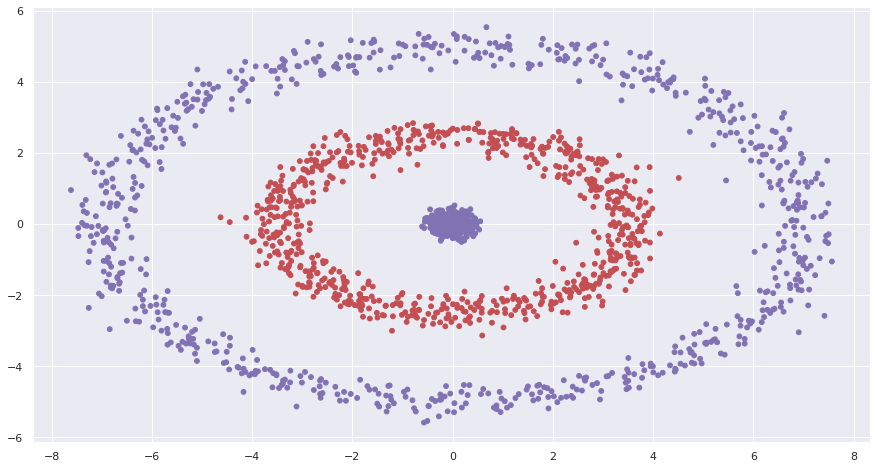

In [ ]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
Xc, yc = noisy_circles
colors = np.array([x for x in 'mrm'])
colors = np.hstack([colors] * 20)
Xb, yb = datasets.make_blobs(n_samples=750, centers=1, n_features=2, center_box=(0.0, 0.0),
                 random_state=0)

yb += 2
Xb[:, 0] =Xb[:, 0]/6
Xb[:, 1] =Xb[:, 1]/5

Xc[:, 0] = Xc[:, 0]*5
Xc[:, 1] = Xc[:, 1]*7

X = np.concatenate((Xc, Xb),)
y = np.concatenate((yc, yb),)
plt.figure(figsize=(15, 8))
plt.scatter(X[:, 1], X[:, 0], color=colors[y].tolist(), s=23)

y_ = [0 if el==2 else el for el in y  ]

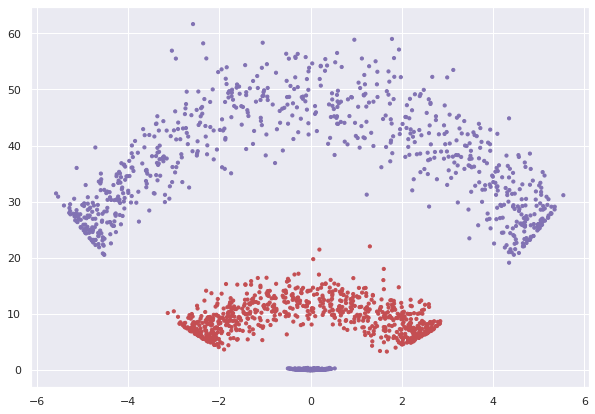

In [ ]:
Z =  (X[:, 0]**2 +X[:, 1]**2)
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0 ], Z, color=colors[y].tolist(), s=10)

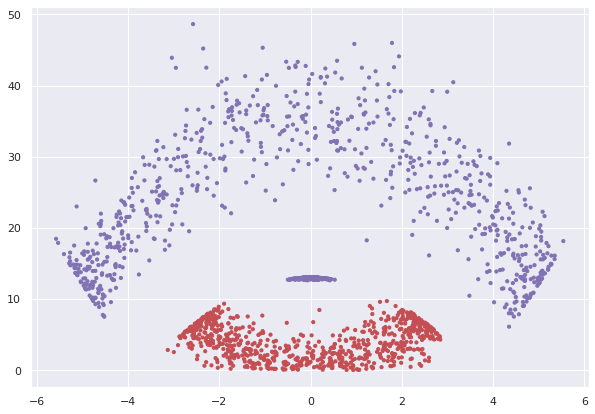

In [ ]:
Z =  np.sqrt((X[:, 0]**2 +X[:, 1]**2-13)**2)
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0 ], Z, color=colors[y].tolist(), s=10)

In [ ]:
def phi(x):
   x_, y_ = x[:, 0], x[:, 1]

   return np.vstack([x_, y_ ,np.sqrt((x_**2 +y_**2-13)**2)]).T

In [ ]:
def kernel(x1, x2):
    return phi(x1) @ phi(x2).T

In [ ]:
model = SVC(kernel=kernel)
_ = model.fit(np.array(X), np.array(y))

In [ ]:
from sklearn.metrics import accuracy_score
print(f'Accuracy on Custom Kernel: {accuracy_score(y, model.predict(X))}')

Accuracy on Custom Kernel: 0.9408888888888889


In [ ]:
model = SVC(kernel='linear')
_ = model.fit(np.array(X), np.array(y))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, model.predict(X))

0.5293333333333333